<a href="https://colab.research.google.com/github/Smit250904/app.py/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers pillow torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.eval()

img_url = "https://images.unsplash.com/photo-1518717758536-85ae29035b6d"
image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

inputs = processor(image, return_tensors="pt")
with torch.no_grad():
    output = model.generate(**inputs)

caption = processor.decode(output[0], skip_special_tokens=True)
print("Generated Caption:", caption)

image.show()


Generated Caption: a dog with its tongue out


In [4]:
!pip install torchvision matplotlib opencv-python


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


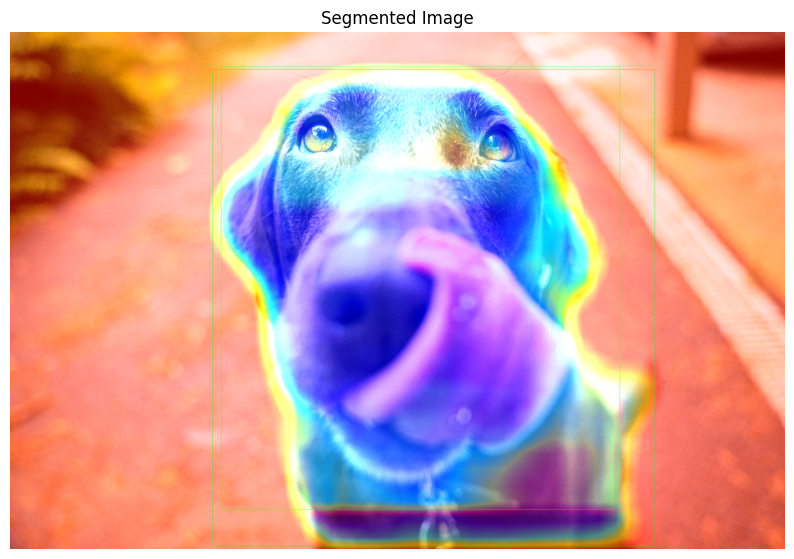

In [14]:
    import torch
    import torchvision
    from torchvision import transforms
    from PIL import Image
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    import requests # Import requests if not already done in this cell

    # Load the pre-trained Mask R-CNN model
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Download an image and save it
    img_url = "https://images.unsplash.com/photo-1518717758536-85ae29035b6d" # Example URL
    img_path = "your_image.jpg"
    response = requests.get(img_url, stream=True)
    if response.status_code == 200:
        with open(img_path, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
    else:
        print(f"Failed to download image from {img_url}")
        # Handle the error or exit

    # Load and preprocess image (same as before or use your own)
    image = Image.open(img_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)

    # Run prediction
    with torch.no_grad():
        prediction = model(img_tensor)

    # Display masks and boxes (limit to top 3 detections for simplicity)
    plt.figure(figsize=(10, 10))
    np_image = np.array(image)
    plt.imshow(np_image)

    for i in range(min(3, len(prediction[0]['masks']))):
        score = prediction[0]['scores'][i].item()
        if score > 0.5:  # confidence threshold
            mask = prediction[0]['masks'][i, 0].mul(255).byte().cpu().numpy()
            label = prediction[0]['labels'][i].item()
            box = prediction[0]['boxes'][i].cpu().numpy()

            # Draw the segmentation mask
            rgba_mask = cv2.applyColorMap(mask, cv2.COLORMAP_JET)
            np_image = cv2.addWeighted(np_image, 1.0, rgba_mask, 0.5, 0)

            # Draw bounding box
            x1, y1, x2, y2 = box.astype(int)
            cv2.rectangle(np_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(np_image)
    plt.axis('off')
    plt.title("Segmented Image")
    plt.show()

📝 Caption: a dog with its tongue out


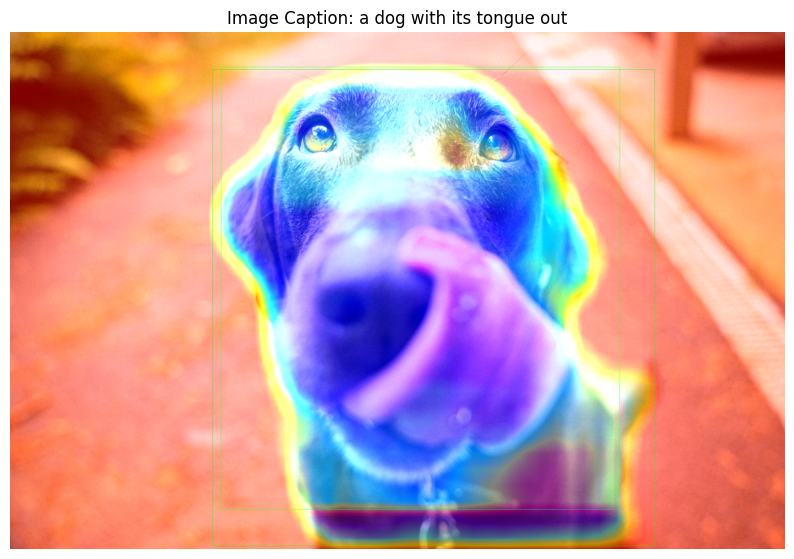

In [15]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Image URL
img_url = "https://images.unsplash.com/photo-1518717758536-85ae29035b6d"
image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# ===== IMAGE CAPTIONING =====
caption_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model.eval()

caption_inputs = caption_processor(image, return_tensors="pt")
with torch.no_grad():
    caption_output = caption_model.generate(**caption_inputs)

caption = caption_processor.decode(caption_output[0], skip_special_tokens=True)
print("📝 Caption:", caption)

# ===== IMAGE SEGMENTATION =====
seg_model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
seg_model.eval()

transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    prediction = seg_model(img_tensor)

# Convert image for overlay
np_image = np.array(image)

# Draw top 3 masks and bounding boxes
for i in range(min(3, len(prediction[0]['masks']))):
    score = prediction[0]['scores'][i].item()
    if score > 0.5:
        mask = prediction[0]['masks'][i, 0].mul(255).byte().cpu().numpy()
        label = prediction[0]['labels'][i].item()
        box = prediction[0]['boxes'][i].cpu().numpy()
        rgba_mask = cv2.applyColorMap(mask, cv2.COLORMAP_JET)
        np_image = cv2.addWeighted(np_image, 1.0, rgba_mask, 0.5, 0)

        # Draw bounding box
        x1, y1, x2, y2 = box.astype(int)
        cv2.rectangle(np_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display image with caption and segmentation
plt.figure(figsize=(10, 10))
plt.imshow(np_image)
plt.title(f"Image Caption: {caption}")
plt.axis("off")
plt.show()
